# PSJP's introduction to Python for Journalism


Welcome! This workbook will walk you through a few key python elements, and have some data challenges to get your hands dirty in computational journalism.




> **Step #1** is to make a copy of this notebook that you can edit and save. Go to `file` -> `Save a copy in Drive` and it will open a copy of this file in a new tab. This copy is private to you so make all the edits and notes you'd like.




While you work through these exercises, you're going to be in a small group. These other people are here so you can talk through what you're doing, ask lots of questions, and problem solve together. The best examples of computational journalism are created collaboratively, and are better because of it. It doesn't matter how far you get in this file, so just enjoy the ride with your peers. I (Eve) will be hopping around to answer questions and guide you. When you get stuck, don't be afraid to google your problem or error, there's a huge online community of problem solvers for programming.


There's 3 parts to this exercise, feel free to hop around and attack what is interesting to you and your team.


1. Intro To Python
2. Challenge #1: I Spy Pandas
3. Challenge #2: Cluster? I hardly know her (feat. Machine Learning!)




> If you already know python, feel free to skip ahead to challenge #1 or challenge #2


> If this is your first time coding, know that this is HARD. Learning a programming language isn't easy and the goal here is just to expose you to some basics. Have fun with it!




## About this document


This file is a Jupyter Notebook and we will be working in Python, a powerful generalist programming language. There's many tools and languages out there for this type of work, this is just one. The way this notebook works is that there are some "blocks'' for text and some for code.


Text is written in something called Markdown. You can double click on this block to see what it looks like and if you're curious you can [learn how to use it here](https://www.markdowntutorial.com/)


Code blocks contain Python expressions, which you can run and see in your browser immediately by pressing the play button on the left or pressing `Shift` + `Enter` with the block focused.


### Enough talk, let's try running some code.


In [ ]:
35 + 125

Your first python expression! I'm so proud. At its core coding is just using a big fancy calculator. You can also save values to **variables**, which are named entities that hold data.

In [ ]:
value = 35

value + 125

You can get an idea of what is inside a variable by using the `type()` **function**. A **function** is a set of steps that are defined to do something based on an input. This one tells you what type of data is inside a variable.


In [ ]:
type(value)

`int` is short for **Integer**, which just means a whole number. There are a few other types of basic data in Python, like...




* **floats** - short for "floating point number" which just means it has a decimal point
* **strings** - any line of text, like `"hello world"`, `'PSJP!'` these are can be defined in python with single or double quotation marks
* **booleans** - `True` or `False` values




These basic types, create the foundation for all computation and can be organized in many different ways which we call **data structures**.


Below are some examples of these data types in use. In your team run each one of them and see if you can understand what's happening. It's okay if something doesn't make sense, make a note of it in a text block and if there's time at the end we can talk about it


In [ ]:
#this is a data structure called a list, its a type of data structure
# you can access a specific value in the list with []

arr = [1, 2, 3, 4, 5]
arr[2]

In [ ]:
#this is a for loop, one of its uses is for moving through the elements of an array
for number in arr:
  print(3 == number)

In [ ]:
cats_are_cool = True
dogs_are_cool = True
fish_suck = False

likes_animals = cats_are_cool & dogs_are_cool and not fish_suck #'and' can be written as 'and' or '&'
likes_animals

In [ ]:
fish_suck = True

likes_animals = cats_are_cool & dogs_are_cool and not fish_suck
likes_some_animals = cats_are_cool | dogs_are_cool or not fish_suck #'or' can be written as 'or' or '|'

print("likes_animals?", likes_animals)
print("likes_some_animals?", likes_some_animals)


In [ ]:
"fish " + "rule" + "!!!!"

In [ ]:
"fish" * 10

**Before moving on to the first challenge, feel free to play around here some more, define your own variables, test what happens when you change some of the values in the above expressions, and write new expressions. This stuff is the foundation for understanding anything you wanna build with Python (or any programming language), and the examples above just scratch the surface**

# Challenge 1: I Spy Pandas
One way to analyze data in Python is with a **library** called **Pandas**, a **library** is just a set of functions and objects from another developer that builds on the core python capabilities that we learned about earlier. Basically, this means less work for bigger outcomes.


First we need to load the library and the data. This data is scraped from OpenStreets with some added address info I accessed through a MapBox API. It contains information on 44470 public bathrooms, most of which are in the USA with a few in the Caribbean, Canada, and Mexico.


In [ ]:
import pandas as pd
df = pd.read_json('https://raw.githubusercontent.com/EveWashington/PSJP-Intro/main/bathroom.json') # this may take a sec
type(df)

**Pandas** stores data in what's called **dataframes**, we can preview the data by calling a few functions:



In [ ]:
df.info(verbose=True, show_counts=True)
#this gives a high level look at the structures of the dataset

In [ ]:
df.head()
#this shows the first 5 rows of a dataset by default
#try adding a number between the () and rerunning this block

In [ ]:
df.sample(10)
#this shows a random sample of (X) number of rows, 1 by default
#try rerunning a few times to see diffrent parts of the dataset

In [ ]:
df.state
#this refrences a series of all the states/provences in order that they appear in the data

In [ ]:
#if you wanna look at just a few columns of the dataset, try this
df[["id", "address", "note"]]

You may notice that this data isn't perfect, not every toilet has a value for every column. This is very common in the real world, and is often caused when different people or organizations encode data differently. This problem is why the first step in a data analysis is often **data cleaning and validation**.


This step helps us understand what information is available in the data, so we can brainstorm options for how to use it in a project. There are many ways to do this, but one of the easiest ways is to use string matching functions to search the dataset.

In [ ]:
#this creates a series of boolean values depending on if the value at that row fulfills the test
#in this case the test is if the `state` field contains the word "New"
df.state.str.contains("New", na=False)

In [ ]:
df[df.state.str.contains("New", na=False)] #we can then filter the df like this

In [ ]:
#and we can combine filters with the binary operators that we saw earlier
df[df.state.str.contains("New", na=False) & df.state.str.contains("York", na=False)]

In [ ]:
#or we can also write the above function like this instead
df[df.state.str.match("New York", na=False)]

In [ ]:
#you can also exclude data that matches the condition with a - (minus) sign
df[-df.state.str.match("New York", na=False)]

In [ ]:
#or just check if a row has a value at all, with the function .isna()
#this function returns true if the value is NaN (Stands for Not a Number)
df[-df["gender_neutral"].isna()]

###Now that you've gotten a taste of filtering and navigating the dataset, time to play....

## ... I Spy!
Below are some challenges, see if you can write filters that help you find the same sets of bathrooms that I found.


> **Hint:** Use `df.info(verbose=True, show_counts=True)` to see what possible column names you can explore


> **Optional Challenge:** If your looking for a challenge, try using regular expressions to write the filters [here's some guidance](https://www.rexegg.com/regex-quickstart.html)

### I Spy.... 17 bathrooms that are in bad condition

In [ ]:
#write your code here

### I Spy.... 3914 bathrooms that are disability or wheelchair accessible

In [ ]:
#write your code here

### I Spy.... 43 bathrooms at Burning Man

In [ ]:
#write your code here

### I Spy.... something you find interesting!
Your turn, find some interesting collection of bathrooms in the dataset (or a few) and show them here, Don’t forget to share them with your group!

In [ ]:
#write your code here

# Challenge #2: Cluster? I hardly know her


**K-mode clustering** is a machine-learning technique used to group a set of data objects into a specified number of **clusters** (or categories), based on their attributes. This method can be used to find interesting patterns and relationships in the data. By understanding how some bathrooms are related to each other we might find interesting outliers or similarities that we wouldn't have noticed otherwise.


We're going to test this with our bathroom dataset, and the first step is installing and importing some packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes

Next, we need to clean our data. This can be done with some simple filtering like we did earlier. The data cannot have any NA values, so select a few columns that you think are interesting and have a good number of shared rows, and filter the data so it's just those rows


> **Hint**: if your having trouble, try the `.dropna()` funcution, I used it like this `filtered = df[["changing_table", "state", "wheelchair"]].dropna()` to create my dataframe






In [ ]:
filtered = "CODE YOUR FILTERED DATA FRAME HERE"

Now, we're gonna slightly reformat that dataframe by converting it to a **Numpy array**. This is a special type of data structure that is often used in Machine Learning

In [ ]:
filtered.reset_index(drop=True, inplace=True) #so our indexes go 1, 2, 3...
data = filtered.to_numpy()
data

Before we can cluster our data we need to learn what the ideal number of groups (clusters) for our dataset is. One way we do that is by creating an **elbow curve** in what's called the **elbow method**.


The elbow method test different cluster sizes, in this case 1-9 and tracks a measure called **cluster variance**. As the number of clusters increase the **cluster variance** decreases at first rapidly, then more gradually. Once it becomes gradual or near constant, that is the ideal number of clusters for a dataset. When graphed this looks like a bent elbow and the point that is the elbow is what we will use when we cluster the data.


Below we are going to run the elbow method and graph an elbow curve. See if you can identify the elbow point on the graph


> **Hint:** the ideal number will also print out


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2277.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2277.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2277.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2277.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2277.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 50, cost: 1683.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 54, cost: 1697.0
Run 2, iteration: 2/100, moves: 0, cost: 1697.0
Init: initializing centroids
Ini

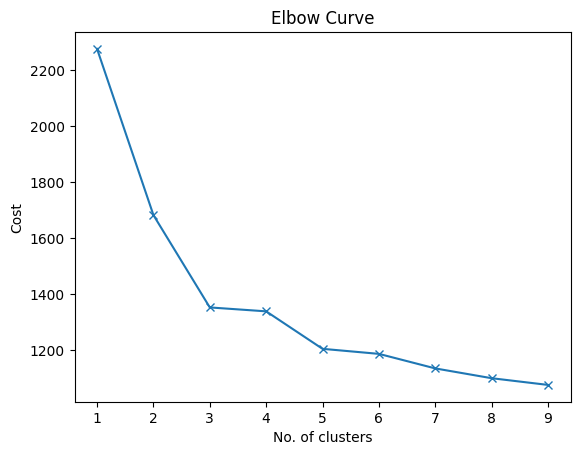

In [ ]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for k in list(K):
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

Finally, update the below function with the Ideal number of clusters that we calculated above and run the prediction model.


* The `KModes()` function creates an untrained machine learning model for K-Modes clustering.
* The `fit_predict()` function, when invoked on an untrained model, takes a numpy array containing data as its input, trains the machine learning model, and classifies each data point as part of a cluster.
* To end we will add a new column to our original filtered data frame that says what cluster each bathroom belongs to


In [ ]:
number_of_clusters = 3 #UPDATE ME

In [ ]:
kmode = KModes(n_clusters=number_of_clusters, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)


In [ ]:
filtered['cluster']=pd.Series(clusters)
filtered

**You did it!** Now you can go back and try it with another set of columns or you can explore the clusters by changing the filter below.


**In your groups talk about what separates each cluster, and if these relationships tell you anything interesting about the public restrooms in the dataset.**

In [ ]:
filtered[filtered.cluster == 0]